### Nathan explore notebook 2

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import wrangle
import unicodedata
from nltk.corpus import stopwords

In [2]:
df = wrangle.wrangle_hotel()
df.head()

Using cached file...


,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,...,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
0,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,...,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
1,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,...,0.7906,7,6,0.7906,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great
2,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,...,0.7579,7,6,0.7579,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
3,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,...,0.9414,27,23,0.9414,No Negative,,,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
4,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,...,0.7964,6,5,0.7964,No Negative,,,Great easy to reAch location,great easy reach location,great easy reach location


In [4]:
score_df = pd.DataFrame(df.groupby(df.hotel_name).reviewer_score.mean())
score_df

,reviewer_score
hotel_name,
11 Cadogan Gardens,8.845283
1K Hotel,7.861486
25hours Hotel beim MuseumsQuartier,8.983309
41,9.711650
45 Park Lane Dorchester Collection,9.603571
...,...
citizenM London Bankside,9.112261
citizenM London Shoreditch,9.092005
citizenM Tower of London,9.135591


In [6]:
score_df.reviewer_score.mean()

8.468152572238738

In [7]:
score_df.reviewer_score.min()

5.121538461538461

In [8]:
score_df.reviewer_score.max()

9.725

In [3]:
df.columns

Index(['month_name', 'month', 'year', 'day_name', 'day', 'quarter',
       'hotel_name', 'street', 'city', 'zip_code', 'country', 'lat', 'lng',
       'additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'reviewer_nationality', 'trip_type',
       'nights_stayed', 'group_type',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'nps_group', 'days_since_review', 'neg_sentiment_score',
       'neg_lem_sentiment_score', 'review_total_negative_word_counts',
       'negative_unique_word_count', 'pos_sentiment_score',
       'review_total_positive_word_counts', 'positive_unique_word_count',
       'pos_lem_sentiment_score', 'negative_review', 'negative_clean_review',
       'negative_stem', 'negative_lemma', 'positive_review',
       'positive_clean_review', 'positive_stem', 'positive_lemma'],
      dtype='object')

In [13]:
(df.nps_group == 'promoter').sum()

247037

In [14]:
(df.nps_group == 'detractor').sum()

86851

In [8]:
df.nps_group.size

515738

In [16]:
((df.nps_group == 'promoter').sum() - (df.nps_group == 'detractor').sum()) / df.nps_group.size

0.31059569005968146

In [11]:
def hotel_nps_score(series):
    score = ((series == 'promoter').sum() - (series == 'detractor').sum()) / series.size
    score = round(score * 100)
    return score

In [22]:
hotel_nps_score(df.nps_group)

31

In [10]:
df['hotel_nps_score'] = df.groupby(df.hotel_name).nps_group.apply(hotel_nps_score)

NameError: name 'hotel_nps_score' is not defined

In [28]:
df.head()

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,...,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_stem,negative_lemma,positive_review,positive_clean_review,positive_stem,positive_lemma,hotel_nps_score
review_date,,,,,,,,,,,,,,,,,,,,,
2015-08-04,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,...,0.4019,First day the swimming pool was not opened th...,first day swimmig pool ot opeed therefore coul...,first day swimmig pool ot ope therefor could o...,first day swimmig pool ot opeed therefore coul...,The hotel was clean and accessible,hotel clean accessible,hotel clean access,hotel clean accessible,NaN
2015-08-04,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,...,0.7906,No Negative,egative,eg,egative,very good location breakfast was great,good location breakfast great,good locat breakfast great,good location breakfast great,NaN
2015-08-04,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,...,0.7579,Nothing,,,,It was very nice excellent hotel,nice excellent hotel,nice excel hotel,nice excellent hotel,NaN
2015-08-04,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,...,0.9414,No Negative,egative,eg,egative,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightli citi center easi get tram train reall...,slightly city center easy get tram train reall...,NaN
2015-08-04,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,...,0.7964,No Negative,egative,eg,egative,Great easy to reAch location,great easy reach location,great easi reach locat,great easy reach location,NaN


In [30]:
df.groupby(df.hotel_name).nps_group.apply(hotel_nps_score).sort_values()

hotel_name
Hotel Liberty                  -78
Ibis Styles Milano Palmanova   -58
Savoy Hotel Amsterdam          -56
Kube Hotel Ice Bar             -53
Villa Eugenie                  -52
                                ..
Bulgari Hotel London            92
The Soho Hotel                  92
Hotel Casa Camper               93
H10 Casa Mimosa 4 Sup           93
Ritz Paris                      93
Name: nps_group, Length: 1492, dtype: int64

In [12]:
hotel_df = pd.DataFrame(df.groupby(df.hotel_name).nps_group.apply(hotel_nps_score))

In [13]:
hotel_df.sort_values(by='nps_group', ascending=False)

,nps_group
hotel_name,
H10 Casa Mimosa 4 Sup,93
Ritz Paris,93
Hotel Casa Camper,93
The Soho Hotel,92
Bulgari Hotel London,92
...,...
Villa Eugenie,-52
Kube Hotel Ice Bar,-53
Savoy Hotel Amsterdam,-56


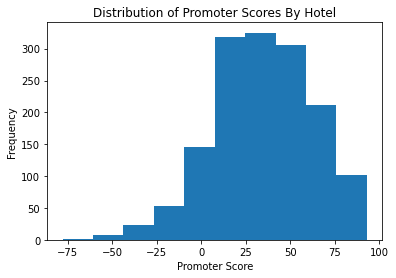

In [15]:
hotel_df.nps_group.plot.hist()
plt.title('Distribution of Promoter Scores By Hotel')
plt.xlabel('Promoter Score')
plt.show()

In [ ]:
#Avg sentiment score of positive feedback by hotel
pos_sent = pd.DataFrame(df.groupby(df.hotel_name).pos_lem_sentiment_score.mean())
#avg sentiment score for negative feedback by hotel
neg_sent = pd.DataFrame(df.groupby(df.hotel_name).neg_lem_sentiment_score.mean())
#count of nps_group values
nps_type = pd.DataFrame(df.groupby(df.hotel_name).nps_group.value_counts()).unstack()
#pull top neg dominant topic by hotel
neg_dom_top = pd.DataFrame(df.groupby(df.hotel_name).negative_dominant_topic.agg(lambda hotel_topics: hotel_topics.value_counts().head(1).index))
#pull top pos dominant topic by hotel
pos_dom_top = pd.DataFrame(df.groupby(df.hotel_name).positive_dominant_topic.agg(lambda hotel_topics: hotel_topics.value_counts().head(1).index))
#concat the dfs
hotels = pd.concat([hotel_df, nps_type.nps_group.detractor, nps_type.nps_group.passive, nps_type.nps_group.promoter,
                    pos_sent.pos_lem_sentiment_score, neg_sent.neg_lem_sentiment_score, neg_dom_top.negative_dominant_topic,
                   pos_dom_top.positive_dominant_topic], axis=1)
#concat the keywords
cols = ['Word 0', 'Word 1', 'Word 2', 'Word 3', 'Word 4', 'Word 5', 'Word 6', 'Word 7', 'Word 8', 'Word 9', 'Word 10', 'Word 11', 'Word 12', 'Word 13', 'Word 14']
n_words = pd.DataFrame(neg_keywords[cols].apply(lambda row: ', '.join(row.values.astype(str)), axis=1))
p_words = pd.DataFrame(pos_keywords[cols].apply(lambda row: ', '.join(row.values.astype(str)), axis=1))
#clean and merge with hotels df
n_words = n_words.reset_index()
n_words.rename(columns={0:'neg_keywords'}, inplace=True)
p_words = p_words.reset_index()
p_words.rename(columns={0:'pos_keywords'}, inplace=True)
hotels = hotels.merge(n_words, how='left', left_on='negative_dominant_topic', right_on='index')
hotels = hotels.merge(p_words, how='left', left_on='positive_dominant_topic', right_on='index')
hotels = hotels.drop(columns={'index_x', 'index_y'})
hotels.head()

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import wrangle
import unicodedata
from nltk.corpus import stopwords

In [2]:
df = wrangle.wrangle_hotel()
df.head()

,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,...,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
review_date,,,,,,,,,,,,,,,,,,,,,
2015-08-04,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,...,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
2015-08-04,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,...,0.7906,7,6,0.7906,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great
2015-08-04,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,...,0.7579,7,6,0.7579,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
2015-08-04,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,...,0.9414,27,23,0.9414,No Negative,,,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
2015-08-04,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,...,0.7964,6,5,0.7964,No Negative,,,Great easy to reAch location,great easy reach location,great easy reach location


In [3]:
df.negative_clean_review.isnull().sum()

0

In [4]:
df = wrangle.wrangle_hotel()
df.head()

Using cached csv file...


,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,...,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
0,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,...,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
1,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,...,0.7906,7,6,0.7906,No Negative,NaN,NaN,very good location breakfast was great,good location breakfast great,good location breakfast great
2,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,...,0.7579,7,6,0.7579,Nothing,NaN,NaN,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
3,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,...,0.9414,27,23,0.9414,No Negative,NaN,NaN,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
4,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,...,0.7964,6,5,0.7964,No Negative,NaN,NaN,Great easy to reAch location,great easy reach location,great easy reach location


In [5]:
df.negative_clean_review.isnull().sum()

153097

In [2]:
df = wrangle.wrangle_hotel()
df.head()

,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,...,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
0,2015-08-04,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,...,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
1,2015-08-04,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,...,0.7906,7,6,0.7906,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great
2,2015-08-04,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,...,0.7579,7,6,0.7579,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
3,2015-08-04,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,...,0.9414,27,23,0.9414,No Negative,,,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
4,2015-08-04,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,...,0.7964,6,5,0.7964,No Negative,,,Great easy to reAch location,great easy reach location,great easy reach location


In [3]:
df.negative_clean_review.isnull().sum()

0

In [4]:
df = wrangle.wrangle_hotel()
df.head()

Using cached csv file...


,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,...,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
0,1438646400000,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,...,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
1,1438646400000,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,...,0.7906,7,6,0.7906,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great
2,1438646400000,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,...,0.7579,7,6,0.7579,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
3,1438646400000,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,...,0.9414,27,23,0.9414,No Negative,,,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
4,1438646400000,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,...,0.7964,6,5,0.7964,No Negative,,,Great easy to reAch location,great easy reach location,great easy reach location


In [2]:
df = wrangle.wrangle_hotel()
df.head()

,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,...,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
0,2015-08-04,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,...,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
1,2015-08-04,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,...,0.7906,7,6,0.7906,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great
2,2015-08-04,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,...,0.7579,7,6,0.7579,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
3,2015-08-04,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,...,0.9414,27,23,0.9414,No Negative,,,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
4,2015-08-04,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,...,0.7964,6,5,0.7964,No Negative,,,Great easy to reAch location,great easy reach location,great easy reach location


In [3]:
df.negative_clean_review.isnull().sum()

0

In [4]:
df = wrangle.wrangle_hotel()
df.head()

Using cached file...


,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,...,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
0,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,...,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
1,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,...,0.7906,7,6,0.7906,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great
2,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,...,0.7579,7,6,0.7579,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
3,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,...,0.9414,27,23,0.9414,No Negative,,,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
4,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,...,0.7964,6,5,0.7964,No Negative,,,Great easy to reAch location,great easy reach location,great easy reach location


In [5]:
df[df['group_type'] == 'couple'].shape

(252294, 39)

In [6]:
df.shape

(515738, 39)

In [7]:
252294 / 515738

0.48919024776146025

In [8]:
df[df['trip_type'] == 'leisure'].shape

(417778, 39)

In [9]:
417778 / 515738

0.8100585956435244

In [10]:
df[df['nights_stayed'] <=4].shape

(471220, 39)

In [11]:
471220 / 515738

0.9136809775506168

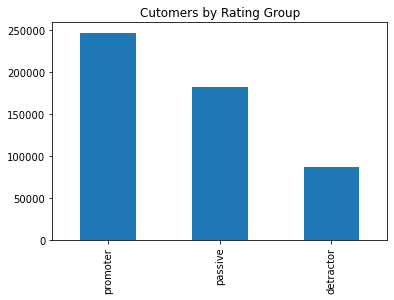

In [15]:
df.nps_group.value_counts().plot.bar()
plt.title('Cutomers by Rating Group')
plt.show()

In [16]:
df[df['nps_group'] == 'promoter'].shape

(247037, 39)

In [17]:
247037 / 515738

0.4789970876685449

In [18]:
df[df['nps_group'] == 'passive'].shape

(181850, 39)

In [19]:
181850 / 515738

0.3526015147225917

In [20]:
df[df['nps_group'] == 'detractor'].shape

(86851, 39)

In [21]:
86851 / 515738

0.1684013976088634